In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import pymannkendall as pmk # trend testi
from statsmodels.graphics.tsaplots import plot_acf # otokorelasyon ve trend
from arch.unitroot import ADF, PhillipsPerron, KPSS # durağanlık

In [5]:
data = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/livestock.csv",
                  parse_dates = ["date"],
                  index_col = "date")

In [6]:
data.head()

,value
date,
1961-01-01,232.288994
1962-01-01,229.536258
1963-01-01,233.145936
1964-01-01,243.763684
1965-01-01,252.602916


In [8]:
df = data.copy()

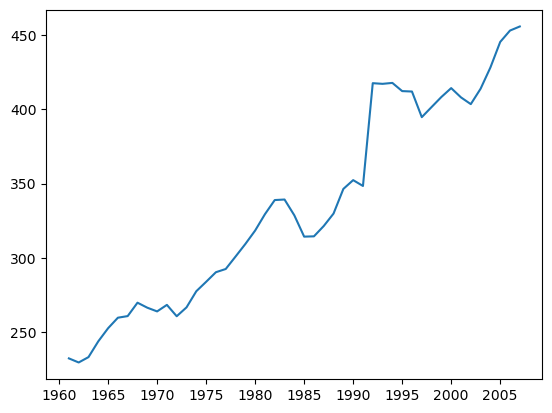

In [10]:
plt.plot(df);

In [13]:
test = pmk.original_test(df)
test

Mann_Kendall_Test(trend='increasing', h=True, p=0.0, z=8.491839889828938, Tau=0.8575393154486587, s=927.0, var_s=11891.0, slope=4.798092125, intercept=218.24451312500003)

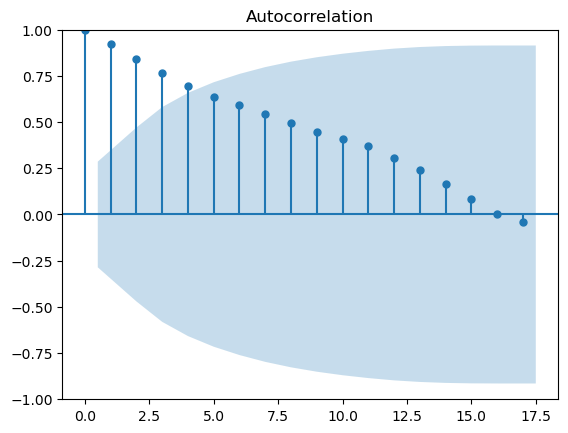

In [18]:
plot_acf(df);

In [21]:
adf = ADF(df, trend = "ct", method = "aic")
adf

Test Statistic,-2.689
P-value,0.241
Lags,0


In [22]:
adf.regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     3.697
Date:                Tue, 03 Oct 2023   Prob (F-statistic):             0.0330
Time:                        07:07:41   Log-Likelihood:                -176.43
No. Observations:                  46   AIC:                             358.9
Df Residuals:                      43   BIC:                             364.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Level.L1      -0.2869      0.107     -2.689      0.010      -0.502      -0.072
const         66.2355     23.540      2.814      0.007      18.763     113.708
trend          1.4462      0.534      2.707      0.010       0.369       2.523
==============================================================================
Omnibus:                       52.907   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              394.322
Skew:                           2.672   Prob(JB):                     2.37e-86
Kurtosis:                      16.311   Cond. No.                     4.68e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
pp = PhillipsPerron(df, trend = "ct")
pp

Test Statistic,-2.032
P-value,0.584
Lags,10


In [26]:
pp.regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     3152.
Date:                Tue, 03 Oct 2023   Prob (F-statistic):           2.32e-47
Time:                        07:09:55   Log-Likelihood:                -176.43
No. Observations:                  46   AIC:                             358.9
Df Residuals:                      43   BIC:                             364.4
Df Model:                           2                                         
Covariance Type:                  HAC                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Level.L1       0.7131      0.068     10.418      0.000       0.579       0.847
const         66.2355     15.246      4.345      0.000      36.355      96.117
trend          1.4462      0.360      4.020      0.000       0.741       2.151
==============================================================================
Omnibus:                       52.907   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              394.322
Skew:                           2.672   Prob(JB):                     2.37e-86
Kurtosis:                      16.311   Cond. No.                     4.68e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 10 lags and without small sample correction
[2] The condition number is large, 4.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
kpss = KPSS(df, trend = "ct")
kpss

Test Statistic,0.067
P-value,0.377
Lags,3


In [30]:
kpss = KPSS(df, trend = "c")
kpss

Test Statistic,1.026
P-value,0.002
Lags,4


In [31]:
# KPSS testi durağan iken ADF testi durağan değil ise durağan trenddir. (deterministik)